## Simulations

---

### Imports

In [2]:
import utils
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import matplotlib.colors as mc
from matplotlib.colors import LinearSegmentedColormap
utils.rcparams()

In [3]:
# Load the data and gather the primary and secondary samples
list_sources = utils.full_loader('catalogue_combined.csv')
primary_sample = list_sources[list_sources['sample'] == 2]
primary_sample = primary_sample.reset_index()

# Split samples into SPT and HerBS sources
spt_sample = primary_sample[primary_sample['spt_herbs'] == 1]
herbs_sample = primary_sample[primary_sample['spt_herbs'] == 2]
spt_sample = spt_sample.reset_index()
herbs_sample = herbs_sample.reset_index()

In [4]:
# Load catalogues and result dataframes
spt_catalogue_ot, spt_catalogue_ot_df = utils.load_catalogue('model_results', 'spt_catalogue_ot'), utils.load_catalogue('model_results', 'spt_catalogue_ot_summary')
herbs_catalogue_ot, herbs_catalogue_ot_df = utils.load_catalogue('model_results', 'herbs_catalogue_ot'), utils.load_catalogue('model_results', 'herbs_catalogue_ot_summary')

In [5]:
# Define continuous colour maps for SPT and HerBS
colors_red = [mc.to_rgba("white"), mc.to_rgba("tab:red")]
colors_black = [mc.to_rgba("white"), mc.to_rgba("k")]
reds = LinearSegmentedColormap.from_list("Custom", colors_red, N = 256)
blacks = LinearSegmentedColormap.from_list("Custom", colors_black, N = 256)

---

### Signal to Noise Ratio Ranges

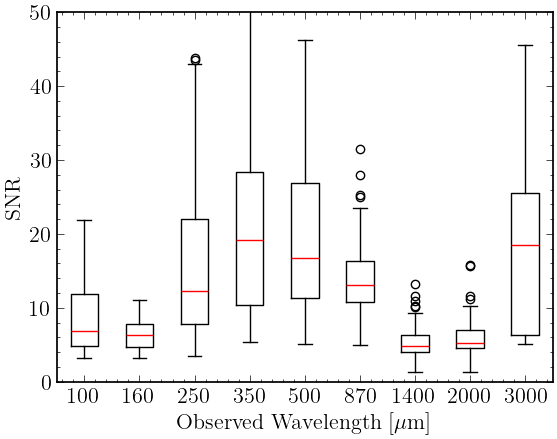

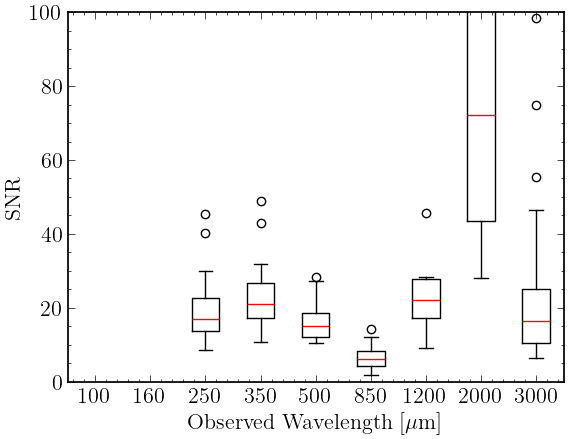

In [6]:
# Gather SNR from real data
spt_snr = np.array([spt_sample['S_'+str(wave)]/spt_sample['E_'+str(wave)] for wave in utils.Data().wavelength_obs_um_spt])
herbs_snr = np.array([herbs_sample['S_'+str(wave)]/herbs_sample['E_'+str(wave)] for wave in utils.Data().wavelength_obs_um_herbs])

# Clean SNR data of NaNs
spt_mask = ~np.isnan(spt_snr)
herbs_mask = ~np.isnan(herbs_snr)
spt_snr_clean = [d[m] for d, m in zip(spt_snr, spt_mask)]
herbs_snr_clean = [d[m] for d, m in zip(herbs_snr, herbs_mask)]

# Boxplots of SNR
fig, ax = plt.subplots()
ax.boxplot(spt_snr_clean, labels=utils.Data().wavelength_obs_um_spt)
ax.set_xlabel(r'Observed Wavelength [$\mu$m]')
ax.set_ylabel(r'SNR')
ax.set_ylim(0,50)
plt.savefig(os.getcwd() + '/figures/Figure_not_used_3.pdf', dpi=1000)
plt.show()

fig, ax = plt.subplots()
ax.boxplot(herbs_snr_clean, labels=utils.Data().wavelength_obs_um_herbs)
ax.set_xlabel(r'Observed Wavelength [$\mu$m]')
ax.set_ylabel(r'SNR')
ax.set_ylim(0,100)
plt.savefig(os.getcwd() + '/figures/Figure_not_used_4.pdf', dpi=1000)
plt.show()

In [7]:
# SPT mean and standard deviation of SNRs
spt_snr_mean = [np.mean(snr) for snr in spt_snr_clean]
spt_snr_std = [np.std(snr) for snr in spt_snr_clean]

# HerBS mean and standard deviation of SNRs
herbs_snr_mean = [np.mean(snr) for snr in herbs_snr_clean]
herbs_snr_std = [np.std(snr) for snr in herbs_snr_clean]

# Print the mean and standard deviation of SNRs
for wave in range(len(utils.Data().wavelength_obs_um_spt)):
    print('SPT {}-micron SNR: Mean = {:.2f} / s.d = {:.2f}'.format(utils.Data().wavelength_obs_um_spt[wave], spt_snr_mean[wave], spt_snr_std[wave]))
print('**********')
for wave in range(len(utils.Data().wavelength_obs_um_herbs)):
    print('HerBS {}-micron SNR: Mean = {:.2f} / s.d = {:.2f}'.format(utils.Data().wavelength_obs_um_herbs[wave], herbs_snr_mean[wave], herbs_snr_std[wave]))

SPT 100-micron SNR: Mean = 9.05 / s.d = 5.61
SPT 160-micron SNR: Mean = 6.34 / s.d = 2.05
SPT 250-micron SNR: Mean = 17.26 / s.d = 13.77
SPT 350-micron SNR: Mean = 21.81 / s.d = 13.60
SPT 500-micron SNR: Mean = 20.05 / s.d = 11.51
SPT 870-micron SNR: Mean = 14.12 / s.d = 4.88
SPT 1400-micron SNR: Mean = 5.34 / s.d = 2.39
SPT 2000-micron SNR: Mean = 6.00 / s.d = 2.53
SPT 3000-micron SNR: Mean = 18.69 / s.d = 15.31
**********
HerBS 100-micron SNR: Mean = nan / s.d = nan
HerBS 160-micron SNR: Mean = nan / s.d = nan
HerBS 250-micron SNR: Mean = 19.29 / s.d = 8.11
HerBS 350-micron SNR: Mean = 22.80 / s.d = 8.13
HerBS 500-micron SNR: Mean = 16.05 / s.d = 4.73
HerBS 850-micron SNR: Mean = 6.50 / s.d = 3.09
HerBS 1200-micron SNR: Mean = 23.12 / s.d = 10.02
HerBS 2000-micron SNR: Mean = 91.68 / s.d = 61.33
HerBS 3000-micron SNR: Mean = 24.16 / s.d = 21.37


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divi

---

### Create Simulation Parameter Files

In [11]:
# Low, median and high beta values from SED fitting
spt_beta_low, spt_beta_median, spt_beta_high = np.percentile(spt_catalogue_ot_df['beta'], [16,50,84])
herbs_beta_low, herbs_beta_median, herbs_beta_high = np.percentile(herbs_catalogue_ot_df['beta'], [16,50,84])

# Define simulation wavelengths
spt_wavelengths = np.array([100,160,250,350,500,870,1400,2000,3000])
herbs_wavelengths = np.array([250,350,500,850,1200,2000,3000])

# Define simulation detection thresholds
spt_minimums = np.array([0,0,0,0,0,0.025,0,0,0])
herbs_minimums = np.array([0,0,0.08,0,0,0,0])

# Define simulation calibration errors
spt_calibrations = np.array([7,7,5.5,5.5,5.5,12,7,7,10])
herbs_calibrations = np.array([5.5,5.5,5.5,5,10,10,10])

# Define simulation SNRs, as given above
spt_snr = np.array([(9.05,5.61),(6.34,2.05),(17.26,13.77),(21.81,13.60),(20.05,11.51),(14.12,4.88),(5.34,2.39),(6.00,2.53),(18.69,15.31)])
herbs_snr = np.array([(19.29,8.11),(22.80,8.13),(16.05,4.73),(6.50,3.09),(23.12,10.02),(91.68,61.33),(24.16,21.37)])

# Parameter file - SPT Optically Thin
parameters_spt_ot = {'wavelengths_obs_um': spt_wavelengths,
                    'minimum_detections': spt_minimums,
                    'calibrations': spt_calibrations,
                    'snr': spt_snr,
                    'cmb': True,
                    'mag': 5.5,
                    'range_z': (2,6),
                    'range_logmulir': (13,14.5),
                    'lir_limits': (8,1000),
                    'range_t': (20,50),
                    'range_beta': (0.5,4),
                    'range_alpha': (1,5)}

# Parameter file - SPT Optically Thin (Beta = 2)
parameters_spt_beta2_ot = {'wavelengths_obs_um': spt_wavelengths,
                            'minimum_detections': spt_minimums,
                            'calibrations': spt_calibrations,
                            'snr': spt_snr,
                            'cmb': True,
                            'mag': 5.5,
                            'range_z': (0,7),
                            'range_logmulir': (13,14.5),
                            'lir_limits': (8,1000),
                            'range_t': (20,50),
                            'range_beta': (spt_beta_low, spt_beta_high),
                            'range_alpha': (1,5)}

# Parameter file - HerBS Optically Thin
parameters_herbs_ot = {'wavelengths_obs_um': herbs_wavelengths,
                     'minimum_detections': herbs_minimums,
                     'calibrations': herbs_calibrations,
                     'snr': herbs_snr,
                     'cmb': True,
                     'mag': 5.3,
                     'range_z': (2,4),
                     'range_logmulir': (13,14),
                     'lir_limits': (8,1000),
                     'range_t': (20,50),
                     'range_beta': (0.5,4),
                     'range_alpha': (1,5)}

# Parameter file - HerBS Optically Thin (Beta = 2)
parameters_herbs_beta2_ot = {'wavelengths_obs_um': herbs_wavelengths,
                            'minimum_detections': herbs_minimums,
                            'calibrations': herbs_calibrations,
                            'snr': herbs_snr,
                            'cmb': True,
                            'mag': 5.3,
                            'range_z': (0,7),
                            'range_logmulir': (13,14),
                            'lir_limits': (8,1000),
                            'range_t': (20,50),
                            'range_beta': (herbs_beta_low, herbs_beta_high),
                            'range_alpha': (1,5)}

---

### Run Simulations

In [ ]:
# Run a single simulation
inputs, outputs, galaxies_output = utils.mock_galaxy(250, parameters_spt_ot, 'spt_ot_test')

---

### Combine Simulation Files

In [12]:
def combine_simulations(name):
    """
    Combines small simulations together

    :param name: Common name for small simulations
    """
    # Set up lists for inputs, outputs and mock galaxies
    inputs_all = []
    outputs_all = []
    galaxies_all = []

    # For each simulation in folder, unpack the inputs, outputs and mock galaxies
    for sim in range(len(glob.glob(os.getcwd()+'/simulation_results/'+str(name)+'_*_inputs'))):
        inputs = utils.load_catalogue('/simulation_results/', str(name)+'_'+str(sim+1)+'_inputs')
        outputs = utils.load_catalogue('/simulation_results/', str(name)+'_'+str(sim+1)+'_outputs')
        galaxies = utils.load_catalogue('/simulation_results/', str(name)+'_'+str(sim+1)+'_mock_galaxies')
        inputs_all.append(inputs)
        outputs_all.append(outputs)
        galaxies_all.append(galaxies)

    # Concatenate inputs, outputs and galaxies
    inputs_all = pd.concat(inputs_all)
    outputs_all = pd.concat(outputs_all)
    galaxies_all = [item for list_ in galaxies_all for item in list_]
    inputs_all = inputs_all.reset_index()
    outputs_all = outputs_all.reset_index()

    # Save combined inputs, outputs and mock galaxies under "_all"
    utils.save_catalogue(inputs_all, '/simulation_results/', str(name)+'_inputs_all')
    utils.save_catalogue(outputs_all, '/simulation_results/', str(name)+'_outputs_all')
    utils.save_catalogue(galaxies_all, '/simulation_results/', str(name)+'_mock_galaxies_all')

In [ ]:
# Combine simulations
combine_simulations('spt_ot')
combine_simulations('herbs_ot')
combine_simulations('spt_beta2_ot')
combine_simulations('herbs_beta2_ot')

In [15]:
# Load combined simulations
spt_ot_inputs, spt_ot_outputs = utils.load_catalogue('simulation_results', 'spt_ot_inputs_all'), utils.load_catalogue('simulation_results', 'spt_ot_outputs_all')

herbs_ot_inputs, herbs_ot_outputs = utils.load_catalogue('simulation_results', 'herbs_ot_inputs_all'), utils.load_catalogue('simulation_results', 'herbs_ot_outputs_all')

# Select sources where the inputs and outputs would be detected
spt_ot_inputs_detected, spt_ot_outputs_detected = spt_ot_inputs[spt_ot_inputs['detected'] == 2], spt_ot_outputs[spt_ot_inputs['detected'] == 2]

herbs_ot_inputs_detected, herbs_ot_outputs_detected = herbs_ot_inputs[herbs_ot_inputs['detected'] == 2], herbs_ot_outputs[herbs_ot_inputs['detected'] == 2]

In [18]:
def simulations_results(inputs, outputs, bins, colour_map, name):
    """
    Plots a comparison of input and output dust parameters for mock galaxies

    :param inputs: Input dust parameters
    :param outputs: Output dust parameters
    :bins: Number of bins in 2D histogram
    :colour_map: Colour of 2d histogram
    :name: Figure file name
    """
    # Define a range of dust mass, dust temperature and dust emissivity index
    logm_range = np.linspace(8.5,10.5,1000)
    t_range = np.linspace(20,50,1000)
    beta_range = np.linspace(0.5,4,1000)

    # Perform the kernel density estimate for dust temperature and beta
    xx, yy = np.mgrid[-2.5:2.5:100j, -0.25:0.25:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([inputs['t']-outputs['t'], inputs['beta']-outputs['beta']])
    kernel = scipy.stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    fig, ax = plt.subplots(1, 4, figsize=(20,4))

    # Comparison of input and output dust masses
    ax[0].hist2d(inputs['logm'], outputs['logm'], range=[[min(logm_range),max(logm_range)],[min(logm_range),max(logm_range)]], bins=bins, cmap=colour_map)
    ax[0].text(0.05, 0.9, r'RMSE = {:.2f}\,dex'.format(np.sqrt(np.square(np.subtract(inputs['logm'],outputs['logm'])).mean())), transform=ax[0].transAxes, fontsize=20)
    ax[0].plot(logm_range, logm_range, linestyle='--')
    ax[0].set_box_aspect(1)
    ax[0].set_xlabel(r'log($M_{\textrm{dust}}$ [$M_\odot$]) - Input', fontsize=20)
    ax[0].set_ylabel(r'log($M_{\textrm{dust}}$ [$M_\odot$]) - Output', fontsize=20)
    ax[0].set_xlim(min(logm_range), max(logm_range))
    ax[0].set_ylim(min(logm_range), max(logm_range))

    # Comparison of input and output dust temperatures
    ax[1].hist2d(inputs['t'], outputs['t'], range=[[min(t_range),max(t_range)],[min(t_range),max(t_range)]], bins=bins, cmap=colour_map)
    ax[1].text(0.05, 0.9, r'RMSE = {:.2f}\,K'.format(np.sqrt(np.square(np.subtract(inputs['t'],outputs['t'])).mean())), transform=ax[1].transAxes, fontsize=20)
    ax[1].plot(t_range, t_range, linestyle='--')
    ax[1].set_box_aspect(1)
    ax[1].set_xlabel(r'T [K] - Input', fontsize=20)
    ax[1].set_ylabel(r'T [K] - Output', fontsize=20)
    ax[1].set_xlim(min(t_range), max(t_range))
    ax[1].set_ylim(min(t_range), max(t_range))

    # Comparison of input and output dust emissivity indexes
    ax[2].hist2d(inputs['beta'], outputs['beta'], range=[[min(beta_range),max(beta_range)],[min(beta_range),max(beta_range)]], bins=bins, cmap=colour_map)
    ax[2].text(0.05, 0.9, r'RMSE = {:.2f}'.format(np.sqrt(np.square(np.subtract(inputs['beta'],outputs['beta'])).mean())), transform=ax[2].transAxes, fontsize=20)
    ax[2].plot(beta_range, beta_range, linestyle='--')
    ax[2].set_box_aspect(1)
    ax[2].set_xlabel(r'$\beta$ - Input', fontsize=20)
    ax[2].set_ylabel(r'$\beta$ - Output', fontsize=20)
    ax[2].set_xlim(min(beta_range), max(beta_range))
    ax[2].set_ylim(min(beta_range), max(beta_range))

    # Dust temperature and dust emissivity spectral index correlation
    ax[3].hist2d(inputs['t']-outputs['t'], inputs['beta']-outputs['beta'], range=[[-2.5,2.5],[-0.25,0.25]], bins=bins, cmap=colour_map)
    ax[3].contour(xx, yy, f, colors='k', levels=3, alpha=0.5)
    ax[3].axhline(0, linestyle='--')
    ax[3].axvline(0, linestyle='--')
    ax[3].set_box_aspect(1)
    ax[3].set_xlabel(r'$\Delta T$', fontsize=20)
    ax[3].set_ylabel(r'$\Delta \beta$', fontsize=20)
    ax[3].set_xlim(-2.5, 2.5)
    ax[3].set_ylim(-0.25, 0.25)
    
    plt.savefig(os.getcwd()+'/figures/'+name+'.pdf', dpi=1000)
    plt.show()

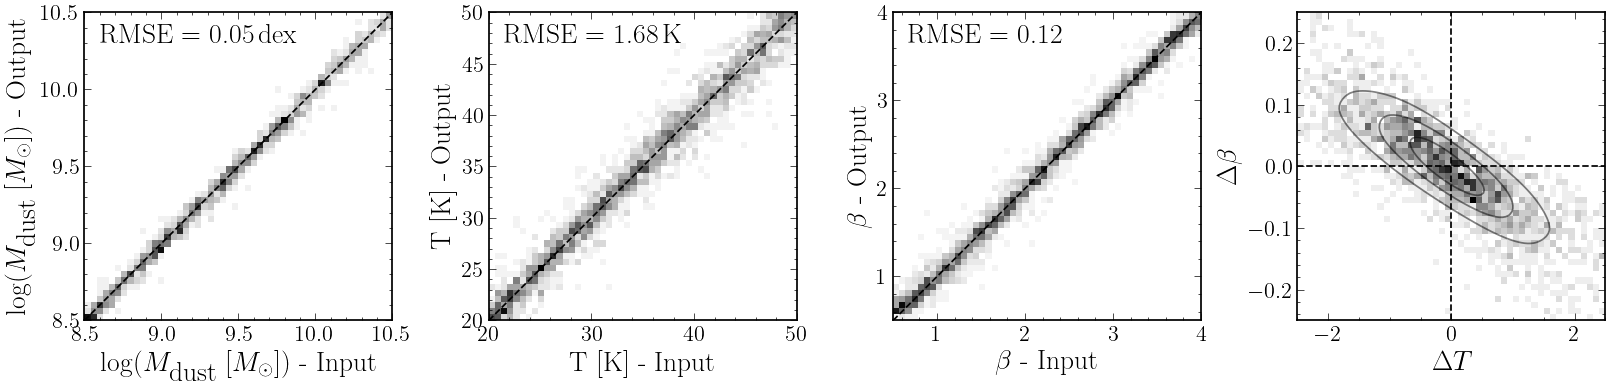

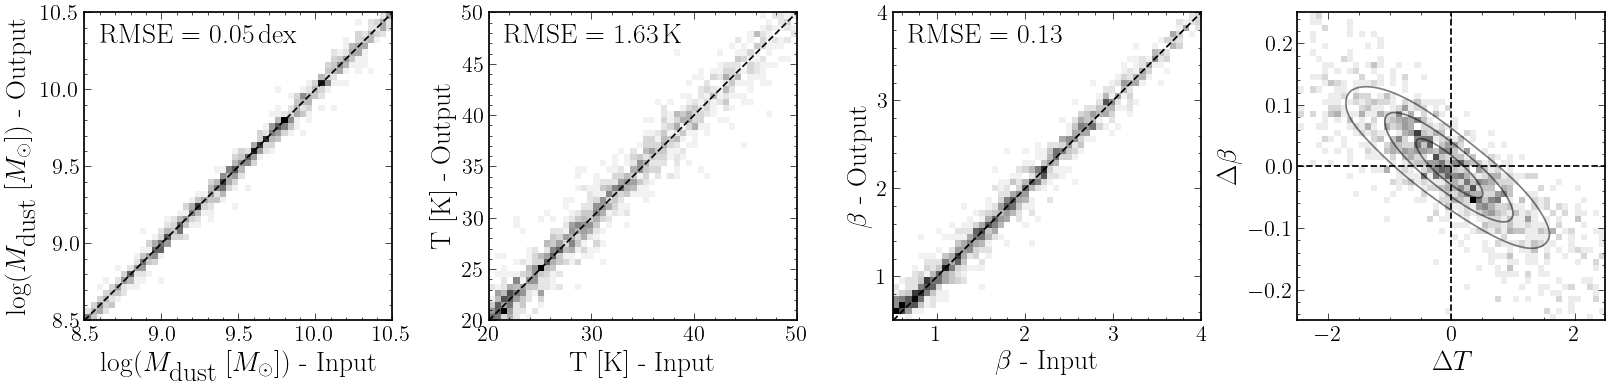

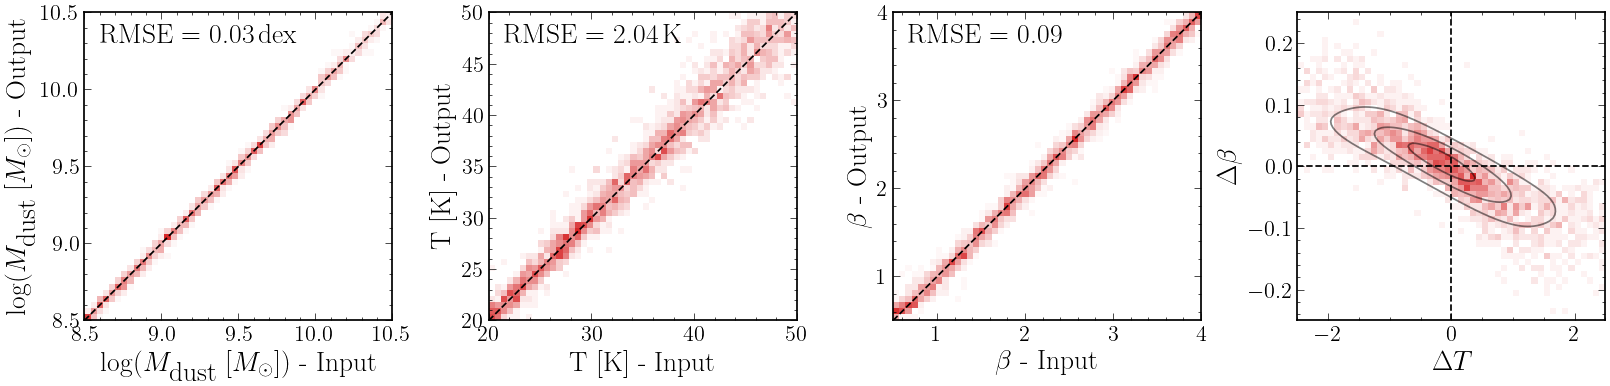

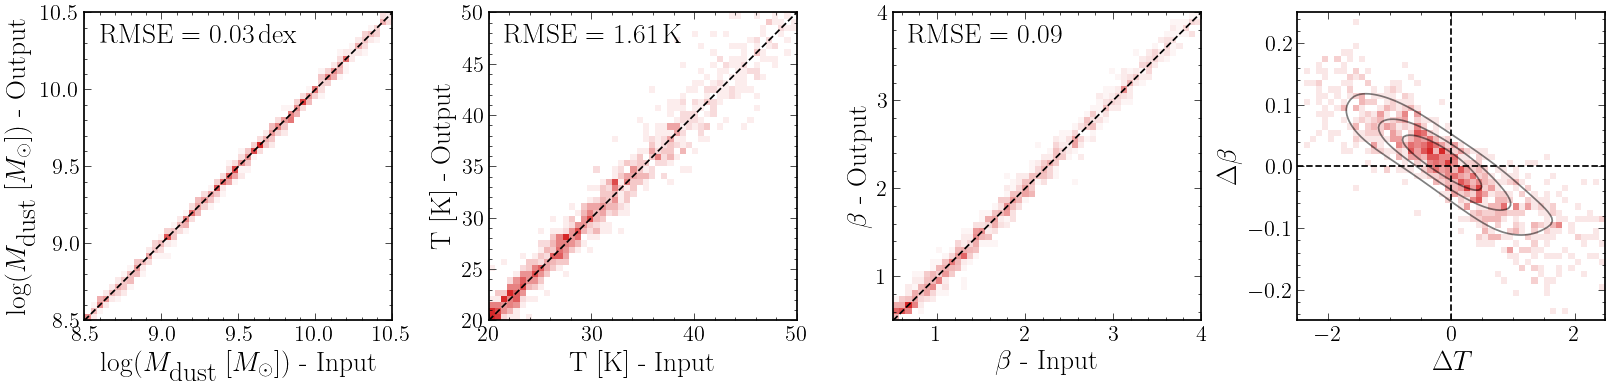

In [19]:
# SPT Optically Thin - All mock galaxies
simulations_results(spt_ot_inputs, spt_ot_outputs, 50, blacks, 'Figure_not_used_3')

# SPT Optically Thin - Detected mock galaxies
simulations_results(spt_ot_inputs_detected, spt_ot_outputs_detected, 50, blacks, 'Figure_4_8_part1')

# HerBS Optically Thin - All mock galaxies
simulations_results(herbs_ot_inputs, herbs_ot_outputs, 50, reds, 'Figure_not_used_4')

# HerBS Optically Thin - Detected mock galaxies
simulations_results(herbs_ot_inputs_detected, herbs_ot_outputs_detected, 50, reds, 'Figure_4_8_part2')

In [20]:
# RMSE of dust temperature and dust emissivity spectral index
spt_t_sim_rmse = np.sqrt(np.sum((spt_ot_outputs_detected['t'] - spt_ot_inputs_detected['t'])**2)/len(spt_ot_inputs_detected['t']))
spt_beta_sim_rmse = np.sqrt(np.sum((spt_ot_outputs_detected['beta'] - spt_ot_inputs_detected['beta'])**2)/len(spt_ot_inputs_detected['beta']))

herbs_t_sim_rmse = np.sqrt(np.sum((herbs_ot_outputs_detected['t'] - herbs_ot_inputs_detected['t'])**2)/len(herbs_ot_inputs_detected['t']))
herbs_beta_sim_rmse = np.sqrt(np.sum((herbs_ot_outputs_detected['beta'] - herbs_ot_inputs_detected['beta'])**2)/len(herbs_ot_inputs_detected['beta']))

print('The RMS scatter in beta-T for simulated SPT sources is {:.2f}-{:.2f}'.format(spt_beta_sim_rmse, spt_t_sim_rmse))
print('The RMS scatter in beta-T for simulated HerBS sources is {:.2f}-{:.2f}'.format(herbs_beta_sim_rmse, herbs_t_sim_rmse))

The RMS scatter in beta-T for simulated SPT sources is 0.13-1.63
The RMS scatter in beta-T for simulated HerBS sources is 0.09-1.61
